# SentimentAnalysisProject


### Libaries

In [174]:
# Libaries 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# To load the IMDB Reviews dataset
from tensorflow.keras.datasets import imdb
# Splitting data
from sklearn.model_selection import train_test_split
# For padding sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences 

# For creating the neural network model
from tensorflow.keras.models import Sequential 
# For defining model layers
from tensorflow.keras.layers import Embedding, Flatten, Dense

### Dataset (IMDB Reviews from Tensorflow package 

In [126]:
# Load imdb dataset
# Selecting top x number of words via num_words to reduce complexity
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000) 

x_combined = np.concatenate([x_train, x_test])
y_combined = np.concatenate([y_train, y_test])

# Split into new train and test sets
x_train, x_test, y_train, y_test = train_test_split(
    x_combined, 
    y_combined, 
    test_size=0.15,  # 15% for testing
    random_state=42
)

# Inspect the dataset structure
print(f"Training data shape: {len(x_train)}\nTest data shape: {len(x_test)}")
print(f"Sample training label: {y_train[0]}, {y_train[1]}")
print(f"Number of positive reviews: {np.sum(y_train == 1)}")
print(f"Number of negative reviews: {np.sum(y_train == 0)}")
print(f"Average review length (in words): {np.mean([len(review) for review in x_train])}")
print(f"Sample review (encoded as integers): {x_train[0]}")
# Training labels: 1 = Positive, 0 = Negative

Training data shape: 42500
Test data shape: 7500
Sample training label: 1, 0
Number of positive reviews: 21202
Number of negative reviews: 21298
Average review length (in words): 234.29428235294117
Sample review (encoded as integers): [1, 13, 86, 219, 14, 22, 17, 6, 2343, 146, 150, 11, 61, 7239, 5, 28, 196, 1192, 12, 8, 30, 61, 514, 20, 4, 65, 9, 8149, 728, 209, 112, 3178, 4, 116, 262, 34, 4390, 5, 6605, 9, 351, 23, 5, 4, 192, 15, 5285, 3423, 9, 99, 154, 18, 27, 217, 152, 193, 245, 39, 4, 8212, 7, 27, 883, 19, 2, 7642, 937, 13, 264, 9, 4, 64, 678, 109, 11, 4, 22, 131, 581, 14, 100, 28, 679, 46, 8, 30, 160, 1208, 325, 2616, 21, 4, 229, 5, 177, 26, 331, 99, 52, 18, 15, 8, 593]


### Decoding a Review

In [127]:
word_index = imdb.get_word_index()

# Add special tokens to the word index
word_index = {k: (v + 3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2 
word_index["<UNUSED>"] = 3

# Reverse word index to decode reviews
reverse_word_index = {value: key for key, value in word_index.items()}

# Decode a sample review
decoded_review = " ".join([reverse_word_index.get(i, "?") for i in x_train[0]])
print(f"Decoded review: {decoded_review}")

Decoded review: <START> i first saw this film as a teenager i'm now in my 40's and have long considered it to be my favorite movie the story is enormously moving without being sentimental the acting especially by march and loy is dead on and the fact that dana andrews is too old for his role doesn't take away from the believability of his romance with <UNK> wright whom i believe is the only major character in the film still living this could have turned out to be another post war melodrama but the script and cast are simply too good for that to happen


### Padding Sequence to ensure equal length of reviews

In [153]:
# Length of a padded Sequence
max_length = 1000

# Pad the sequences
x_train_padded = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test_padded = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

# Check the shape of the padded data
print(f"Padded training data shape: {x_train_padded.shape}")
print(f"Padded test data shape: {x_test_padded.shape}")
# A assortment of 0s added to the end to ensure all reviews are the same length
print(f"Sample padded review (first 150 words): {x_train_padded[2][:150]}")

Padded training data shape: (42500, 1000)
Padded test data shape: (7500, 1000)
Sample padded review (first 150 words): [   1   12    9   96  724   72   89   14  229   16  126 2962   76  329
 1055    5 7897    4  414   16   38   78   12   16 6853    4 1374    5
 4411  139 1482    8   28   77  224   23 3174 4320   34  312  396 1537
 3763 3643 5838  215   28 1599  467   27 2224   54   14   14   20   16
  617   33    6 1955 2824   29   91 1329  317   34    4  145 1312    4
   64 1426   12    2   11   72   16 2240   18    4  177   36   69    8
 3925    4 3985    8   79  143   14   31   13  426  759    8  106   32
    7   12   12   16   38  727   15   12   16  163   37  694  279   12
   80   30 1637   56   34   31    7    4 8060   17    6  904  212    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0]


### Building the Model

In [171]:
# Build Model
model = Sequential([ Embedding(input_dim = 10000, output_dim = 16, input_length = 1000),
                   Flatten(),
                   Dense(16, activation = 'relu'), # Relu HL
                   Dense(1, activation = 'sigmoid') #binary classifier Sigmoid HL
                   ])

### Detemine weights of Model

In [172]:
# Compile model to define weights
model.compile(optimizer = 'adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

### Train Model off training data

In [173]:
trained = model.fit(x_train_padded, y_train, epochs = 5, batch_size = 512, validation_split = 0.2 )

Train on 34000 samples, validate on 8500 samples
Epoch 1/5
34000/34000 [==============================] - 8s 233us/sample - loss: 0.6611 - accuracy: 0.6083 - val_loss: 0.5517 - val_accuracy: 0.7621
Epoch 2/5
34000/34000 [==============================] - 6s 169us/sample - loss: 0.3839 - accuracy: 0.8435 - val_loss: 0.3265 - val_accuracy: 0.8665
Epoch 3/5
34000/34000 [==============================] - 6s 163us/sample - loss: 0.2331 - accuracy: 0.9109 - val_loss: 0.2861 - val_accuracy: 0.8868
Epoch 4/5
34000/34000 [==============================] - 6s 169us/sample - loss: 0.1702 - accuracy: 0.9385 - val_loss: 0.2876 - val_accuracy: 0.8876
Epoch 5/5
34000/34000 [==============================] - 6s 175us/sample - loss: 0.1256 - accuracy: 0.9597 - val_loss: 0.3006 - val_accuracy: 0.8861


### Model Figures

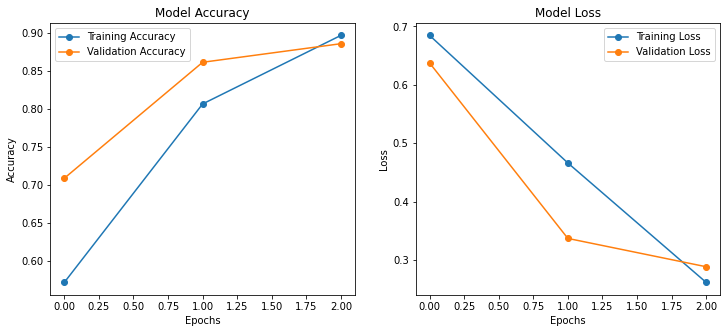

Training Accuracy: 0.5716, 0.8066, 0.8969
Validation Accuracy: 0.7087, 0.8614, 0.8859
Training Loss: 0.6847, 0.4662, 0.2616
Validation Loss: 0.6376, 0.3370, 0.2885


In [170]:
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(trained.history['accuracy'], label='Training Accuracy', marker = 'o')
plt.plot(trained.history['val_accuracy'], label='Validation Accuracy', marker = 'o')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(trained.history['loss'], label='Training Loss', marker = 'o')
plt.plot(trained.history['val_loss'], label='Validation Loss', marker = 'o')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

print(f"Training Accuracy: {', '.join([f'{accuracy:.4f}' for accuracy in trained.history['accuracy']])}")
print(f"Validation Accuracy: {', '.join([f'{accuracy:.4f}' for accuracy in trained.history['val_accuracy']])}")
print(f"Training Loss: {', '.join([f'{loss:.4f}' for loss in trained.history['loss']])}")
print(f"Validation Loss: {', '.join([f'{loss:.4f}' for loss in trained.history['val_loss']])}")

### evaluate model on test data

In [169]:
test_lost, test_accuracy = model.evaluate(x_test_padded, y_test) 
print(f"Test Loss: {test_lost:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

7500/7500 [==============================] - 1s 147us/sample - loss: 0.2814 - accuracy: 0.8899
Test Loss: 0.2814
Test Accuracy: 0.8899
